### Basic Features taken
**- q1_len** length of question 1 is number of letters in it.

**- q2_len** length of question 2 is number of letters in it.

**- q1_num_words** Number of words in questions 1

**- q2_num_wprds** Number of words in questions 2

**- words_common** Number of words common in both questions1 and questions2

**- words_total** Total number of unique words used in both questions1 and questions2

**- words_share**It is the ratio of words_common and words_total in each questions sets both 1 and 2

**- Bow counter_vectorizer coloumns** Here we take maximun used 3000 words.

### **Open and read Dataset**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Link with drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Read Dataset
df = pd.read_csv("/content/gdrive/MyDrive/qura/train.csv")

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
# Take 30000 data only for model building
new_df = df.sample(30000,random_state=2)
new_df.shape

(30000, 6)

### **Feature Engineering(Adding Basic Feature) and EDA**

In [ ]:
# Total number of null value 
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
# Number of duplicated value
new_df.duplicated().sum()

0

In [ ]:
# Feature Engineering
# Length of question 1
new_df['q1_len'] = new_df['question1'].str.len()
# Length of question 2
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
# num_words in question 1
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
# Total_words from question1 and question2
def total_word(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1) + len(w2))

In [ ]:
new_df["word_total"] = new_df.apply(total_word,axis=1)

In [ ]:
# Total_common_words from question1 and question2
def common_word(row):
  w1 = set(map(lambda word: word.lower().strip(),row['question1'].split(" ")))
  w2 = set(map(lambda word: word.lower().strip(),row['question2'].split(" ")))
  return (len(w1) & len(w2))

In [ ]:
new_df["word_common"] = new_df.apply(common_word,axis=1)

In [ ]:
new_df["word_share"] = round(new_df['word_common']/new_df['word_total'],2)

### **EDA of Features**

minimum charecters - 2
maximum charecters - 391
average num of charecters - 59


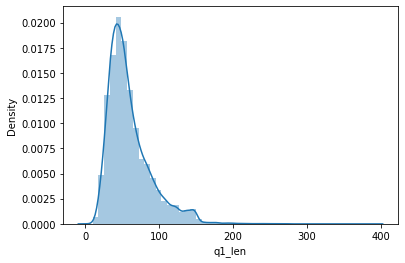

In [ ]:
# Analysis of features
sns.distplot(new_df["q1_len"])
print("minimum charecters -",new_df["q1_len"].min())
print("maximum charecters -",new_df["q1_len"].max())
print("average num of charecters -",int(new_df["q1_len"].mean()))

minimum charecters - 6
maximum charecters - 1151
average num of charecters - 60


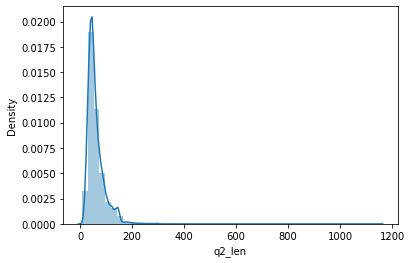

In [ ]:
sns.distplot(new_df["q2_len"])
print("minimum charecters -",new_df['q2_len'].min())
print("maximum charecters -",new_df['q2_len'].max())
print("average num of charecters -",int(new_df['q2_len'].mean()))

minimum num_words - 1
maximum num_words - 72
average num_words - 10


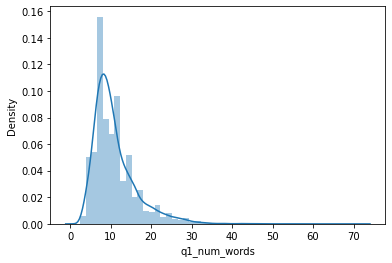

In [ ]:
sns.distplot(new_df["q1_num_words"])
print("minimum num_words -",new_df["q1_num_words"].min())
print("maximum num_words -",new_df["q1_num_words"].max())
print("average num_words -",int(new_df["q1_num_words"].mean()))

minimum num_words - 1
maximum num_words - 237
average num_words - 11


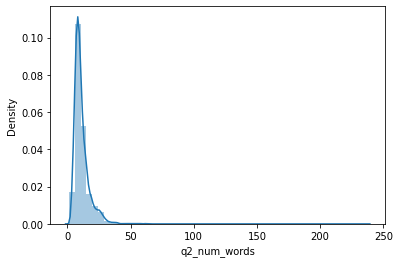

In [ ]:
sns.distplot(new_df["q2_num_words"])
print("minimum num_words -",new_df["q2_num_words"].min())
print("maximum num_words -",new_df["q2_num_words"].max())
print("average num_words -",int(new_df["q2_num_words"].mean()))

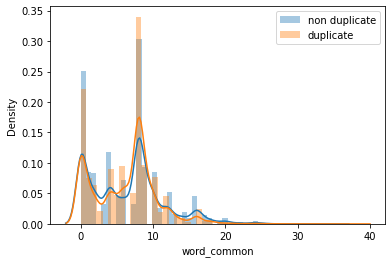

In [ ]:
# Common words
sns.distplot(new_df[new_df["is_duplicate"] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df["is_duplicate"] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

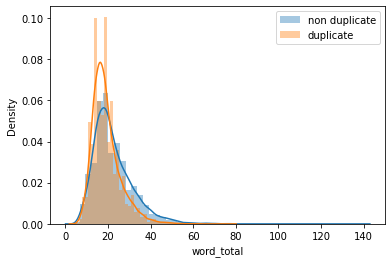

In [ ]:
# Total words
sns.distplot(new_df[new_df["is_duplicate"] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df["is_duplicate"] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

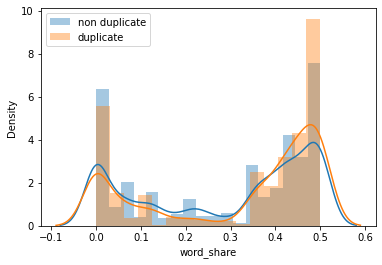

In [ ]:
# Word Share
sns.distplot(new_df[new_df["is_duplicate"] == 0]["word_share"],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]["word_share"],label='duplicate')
plt.legend()
plt.show()

### **Basic Preprocessing of NLP**

#### **Text to lowercase**

In [ ]:
# All the text to lowercase
new_df['question1'] = new_df['question1'].apply(lambda x:x.lower())
new_df['question2'] = new_df['question2'].apply(lambda x:x.lower())

new_df[["question1","question2"]].sample(3)

,question1,question2
372206,which is the best biology book?,which book is best biology book for 11?
260679,"how do i find a good therapist in santa clara,...",what is the best way to find a good therapist ...
297327,which is the best whirlpool repair center in h...,what is the best whirlpool repair center in hy...


#### **Remove HTML Tags**

In [ ]:
# Remove HTML Tags
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

new_df['question1'] = new_df['question1'].apply(remove_html_tags)
new_df['question2'] = new_df['question2'].apply(remove_html_tags)

new_df[["question1","question2"]].sample(3)

,question1,question2
281937,why dogs bark at night?,why do dogs bark during mid night?
65212,why do many girls pull out their tongue while ...,what are the best selfies ever taken?
26662,what are the places to visit in israel?,what's the one must visit place in israel?


#### **Remove stopwords**

In [ ]:
# Remove stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw_list = stopwords.words('english')

new_df['question1'] = new_df['question1'].apply(lambda x:[item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))
new_df['question1'] = new_df['question2'].apply(lambda x:[item for item in x.split() if item not in sw_list]).apply(lambda x: " ".join(x))

new_df[["question1","question2"]].sample(3)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,question1,question2
321562,hell get android 6.0 lg phoenix 2 (lg-k371) ro...,how in the hell do i get this android 6.0 lg p...
305752,technicality results humans intelligent animals?,what technicality results in humans being more...
163322,need minimum investment 1 lakh rupees register...,do we need a minimum investment of 1 lakh rupe...


#### **Remove Punctuation**

In [ ]:
# Remove Punctuation
import string
exclude = string.punctuation

# Remove punctuation 
def remove_punc(text):
    return text.translate(str.maketrans('','',exclude))

new_df['question1'] = new_df['question1'].apply(remove_punc)
new_df['question2'] = new_df['question2'].apply(remove_punc) 

new_df[["question1","question2"]].sample(3)

,question1,question2
205084,take run country make prosperous,what does it take to run a country and make it...
71264,weed legal india,when will weed be legal in india
259967,command list files unix unix like operating sy...,what is the command to list files in unix and ...


#### **Stemming**

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Word tokenize
new_df['question1'] = new_df['question1'].apply(word_tokenize)
new_df['question2'] = new_df['question2'].apply(word_tokenize)

new_df[["question1","question2"]].sample(3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,question1,question2
134883,"[word, duplicity, used, sentence]","[how, is, the, word, duplicity, used, in, a, s..."
340942,"[ca, mba]","[what, should, i, do, between, a, ca, or, an, ..."
20769,"[find, deflection, cantilever, beam, carrying,...","[how, do, i, find, the, deflection, of, a, can..."


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# Function for applying stemming function
def stem_words(text):
    return " ".join([ps.stem(word) for word in text])
# Stemming
new_df['question1'] = new_df['question1'].apply(stem_words)
new_df['question2'] = new_df['question2'].apply(stem_words)

new_df[["question1","question2"]].sample(3)

,question1,question2
167350,best sourc learn python,what is the best sourc to learn python
38854,mark rank requir get aerospac iit bombay,what mark and rank are requir to get aerospac ...
76878,tip well colleg,what are some tip to do well in colleg


### **Text Vectorization**

In [ ]:
# Take question1 and question2 in new data frame for text vectorization
ques_df = new_df[["question1","question2"]]
ques_df.head(3)

,question1,question2
398782,best market autom tool small midsiz compani,what is the best market autom tool for small a...
115086,quit poor want rich do,i am quit poor and i want to be veri rich what...
327711,tiet thapar univers thapar univers institut en...,tiet to thapar univers to thapar univers insti...


In [ ]:
# final data frame where counter vectorizer features concatinate
final_df = new_df.drop(columns=["id","qid1","qid2","question1","question2"])
print(final_df.shape)
final_df.head(3)

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_total,word_common,word_share
398782,1,76,77,12,12,24,12,0.50
115086,0,49,57,12,15,23,8,0.35
327711,0,105,120,25,17,34,4,0.12


In [ ]:
# Bag of word(Count vectorizer)
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# merge question1 and question2
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features= 400)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2], axis=1)
temp_df.shape

(30000, 800)

In [ ]:
# Concat both temp_df and final_df
# temp_df contain vectorizer data
# final_df contain basic_feature
final_df = pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head(3)

(30000, 1608)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_total,word_common,word_share,0,1,...,390,391,392,393,394,395,396,397,398,399
398782,1,76,77,12,12,24,12,0.50,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,23,8,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,34,4,0.12,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Train_Test_split Final Datasets**

In [ ]:
X = final_df.drop(columns="is_duplicate")
y = final_df["is_duplicate"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,test_size=0.2,random_state=1)
X_train.shape,X_test.shape

((24000, 1607), (6000, 1607))

In [ ]:
X_train

array([[ 51.,  48.,  10., ...,   0.,   1.,   0.],
       [ 57.,  81.,  10., ...,   0.,   0.,   0.],
       [ 53.,  54.,   9., ...,   0.,   0.,   0.],
       ...,
       [ 91.,  59.,  17., ...,   0.,   0.,   0.],
       [ 53.,  47.,  10., ...,   0.,   0.,   1.],
       [128.,  60.,  26., ...,   0.,   0.,   0.]])

### **Model Building**

- ##### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
# Accuracy_score
from sklearn.metrics import accuracy_score
print("Accuracy Score -",accuracy_score(y_test,y_pred))

Accuracy Score - 0.7185


- ##### XGBoost Classifier

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
# Accuracy_score
from sklearn.metrics import accuracy_score
print("Accuracy Score -",accuracy_score(y_test,y_pred))

Accuracy Score - 0.7046666666666667
